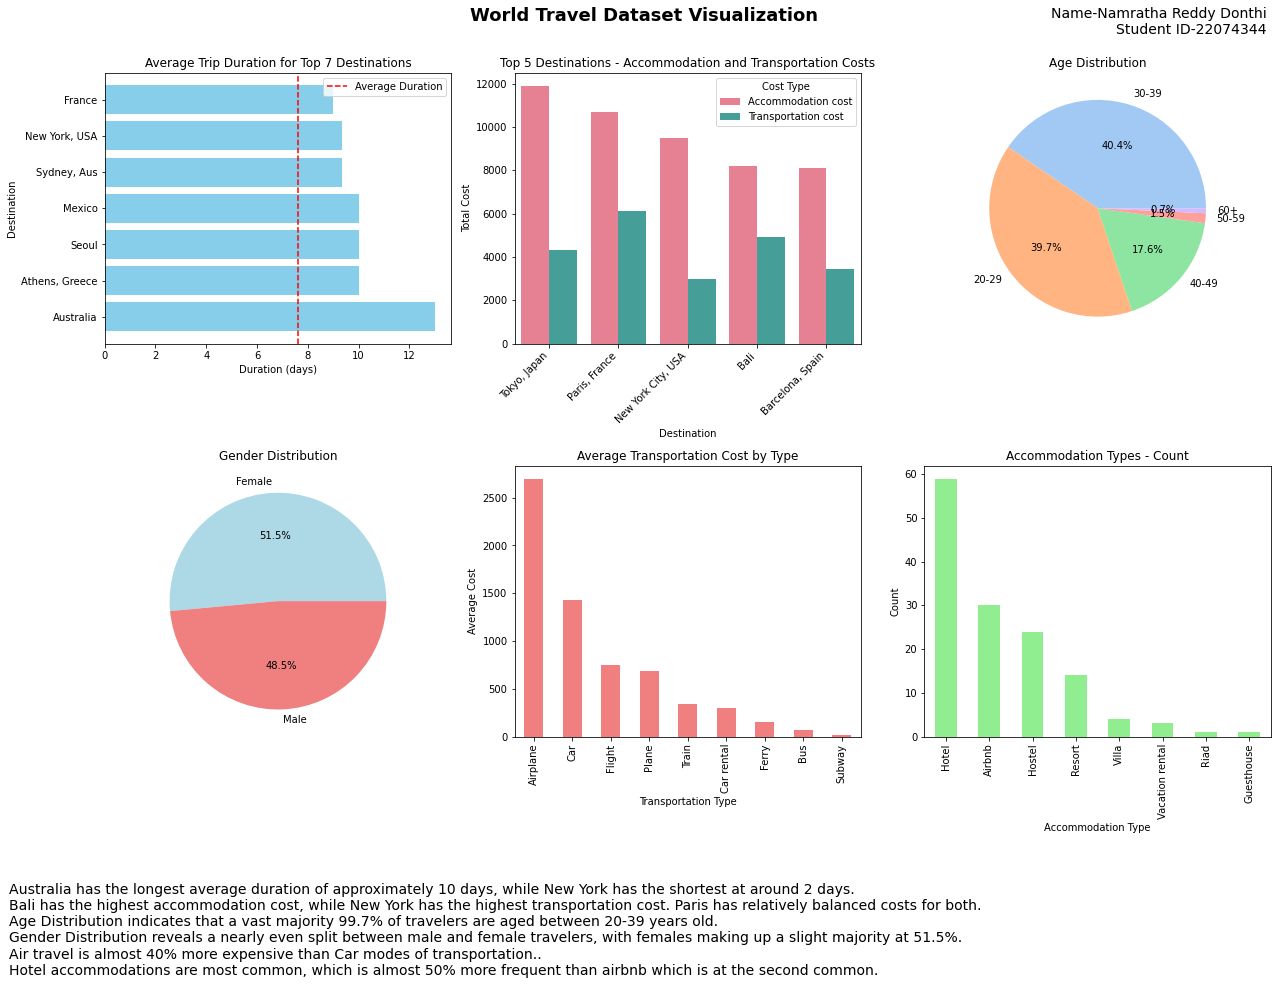

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('Travel details dataset.csv')

# Drop rows with null values
df = df.dropna()

# Extract numerical values using regex and convert to float
df['Accommodation cost'] = df['Accommodation cost'].str.extract('(\d+)', expand=False).astype(float)
df['Transportation cost'] = df['Transportation cost'].str.extract('(\d+)', expand=False).astype(float)

# Set up subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 14))

# Plot 1: Average Trip Duration for Top 5 Destinations
top_destinations_duration = df.groupby('Destination')['Duration (days)'].mean().sort_values(ascending=False).head(7)
axes[0, 0].barh(top_destinations_duration.index, top_destinations_duration, color='skyblue')
axes[0, 0].axvline(x=df['Duration (days)'].mean(), color='red', linestyle='--', label='Average Duration')
axes[0, 0].set_title('Average Trip Duration for Top 7 Destinations')
axes[0, 0].set_xlabel('Duration (days)')
axes[0, 0].set_ylabel('Destination')
axes[0, 0].legend()

# Plot 2: Accommodation Cost and Transportation Cost by Destination (Top 5)
top_destinations_costs = df.groupby('Destination')[['Accommodation cost', 'Transportation cost']].sum().sort_values(by='Accommodation cost', ascending=False).head(5)
melted_costs = pd.melt(top_destinations_costs.reset_index(), id_vars='Destination', var_name='Cost Type', value_name='Cost')
colors_plot2 = sns.color_palette("husl", 2)
sns.barplot(x='Destination', y='Cost', hue='Cost Type', data=melted_costs, ax=axes[0, 1], palette=colors_plot2)
axes[0, 1].set_title('Top 5 Destinations - Accommodation and Transportation Costs')
axes[0, 1].set_xlabel('Destination')
axes[0, 1].set_ylabel('Total Cost')
axes[0, 1].set_xticks(axes[0, 1].get_xticks())
axes[0, 1].set_xticklabels(axes[0, 1].get_xticklabels(), rotation=45, ha='right')  

# Plot 3: Age Distribution Pie Chart by Age Groups
bins = [20, 30, 40, 50, 60, 70]
age_groups = ['20-29', '30-39', '40-49', '50-59', '60+']
df['Age Group'] = pd.cut(df['Traveler age'], bins=bins, labels=age_groups, right=False)
age_distribution = df['Age Group'].value_counts()
colors_plot3 = sns.color_palette('pastel')
age_distribution.plot(kind='pie', autopct='%1.1f%%', ax=axes[0, 2], colors=colors_plot3)
axes[0, 2].set_title('Age Distribution')
axes[0, 2].set_xlabel('')
axes[0, 2].set_ylabel('')

# Plot 4: Gender Distribution
gender_distribution = df['Traveler gender'].value_counts()
colors_plot4 = ['lightblue', 'lightcoral']
gender_distribution.plot(kind='pie', autopct='%1.1f%%', ax=axes[1, 0], colors=colors_plot4)
axes[1, 0].set_title('Gender Distribution')
axes[1, 0].set_xlabel('')
axes[1, 0].set_ylabel('')

# Plot 5: Average Transportation Cost by Type
average_transportation_cost = df.groupby('Transportation type')['Transportation cost'].mean().sort_values(ascending=False)
colors_plot5 = 'lightcoral'
average_transportation_cost.plot(kind='bar', ax=axes[1, 1], color=colors_plot5)
axes[1, 1].set_title('Average Transportation Cost by Type')
axes[1, 1].set_xlabel('Transportation Type')
axes[1, 1].set_ylabel('Average Cost')

# Plot 6: Accommodation Type Count
accommodation_type_count = df['Accommodation type'].value_counts()
colors_plot6 = 'lightgreen'
accommodation_type_count.plot(kind='bar', ax=axes[1, 2], color=colors_plot6)
axes[1, 2].set_title('Accommodation Types - Count')
axes[1, 2].set_xlabel('Accommodation Type')
axes[1, 2].set_ylabel('Count')

# Add overall title
plt.suptitle('World Travel Dataset Visualization', fontsize=18, fontweight='bold')

# Adjust layout
plt.tight_layout(rect=[0, 0.15, 1, 0.97])  # Add extra space at the bottom

# Add name and student ID
plt.figtext(0.98, 0.98, 'Name-Namratha Reddy Donthi\nStudent ID-22074344', ha="right", va="top", fontsize=14, color='black')

# Add one line of sentences at the bottom of the figure
plot_explanations = [
    "Australia has the longest average duration of approximately 10 days, while New York has the shortest at around 2 days.",
    "Bali has the highest accommodation cost, while New York has the highest transportation cost. Paris has relatively balanced costs for both.",
    "Age Distribution indicates that a vast majority 99.7% of travelers are aged between 20-39 years old.",
    "Gender Distribution reveals a nearly even split between male and female travelers, with females making up a slight majority at 51.5%.",
    "Air travel is almost 40% more expensive than Car modes of transportation..",
    "Hotel accommodations are most common, which is almost 50% more frequent than airbnb which is at the second common."
]

plt.figtext(0.01, 0.02, '\n'.join(plot_explanations), ha='left', fontsize=14)

plt.show()
